GINI impurity

In [26]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [15]:
inputs = df.drop('salary_more_then_100k', axis = 'columns')
target = df['salary_more_then_100k']

In [16]:
le_comp = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [17]:
inputs['company_n'] = le_comp.fit_transform(inputs['company'])
inputs['job_n'] = le_comp.fit_transform(inputs['job'])
inputs['degree_n'] = le_comp.fit_transform(inputs['degree'])

In [19]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis = 'columns')

In [21]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [47]:
X_train , X_test , y_train , y_test = train_test_split(inputs_n, target, train_size = 0.9)

In [48]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4444444444444444, 0.9, 'x[2] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'x[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.88888

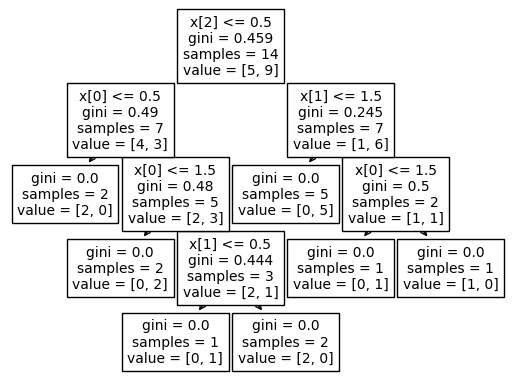

In [59]:
tree.plot_tree(model)

In [49]:
y_perdict = model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
cm = confusion_matrix(y_test, y_perdict)

Text(95.72222222222221, 0.5, 'Truth')

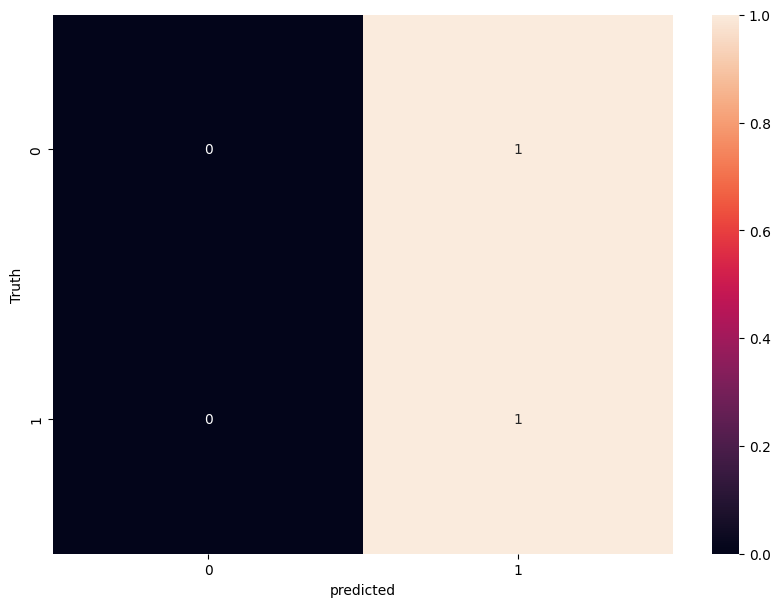

In [53]:
import seaborn as sn 
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))
sn.heatmap(cm , annot=True)
plt.xlabel ('predicted')
plt.ylabel("Truth")

In [56]:
model.predict([[2,2,1]])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [57]:
model.score(X_test, y_test)

0.5

In [58]:
model.predict([[2,0,0]])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)